In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("weatherHistory.csv", na_filter=False, na_values="")

In [3]:
df.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


In [4]:
df.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [5]:
df.rename(columns={"Formatted Date":"dates","Precip Type":"precip_type","Temperature (C)":"temp","Apparent Temperature (C)":"apptemp","Wind Speed (km/h)":"wind_speed","Wind Bearing (degrees)":"wind_bearing_deg","Visibility (km)":"vis","Loud Cover":"loud_cover","Pressure (millibars)":"pres","Daily Summary":"summary"}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
dates               96453 non-null object
Summary             96453 non-null object
precip_type         96453 non-null object
temp                96453 non-null float64
apptemp             96453 non-null float64
Humidity            96453 non-null float64
wind_speed          96453 non-null float64
wind_bearing_deg    96453 non-null float64
vis                 96453 non-null float64
loud_cover          96453 non-null float64
pres                96453 non-null float64
summary             96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [7]:
#sns.pairplot(df)

In [8]:
df.corr()

,temp,apptemp,Humidity,wind_speed,wind_bearing_deg,vis,loud_cover,pres
temp,1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
apptemp,0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
wind_speed,0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
wind_bearing_deg,0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
vis,0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
loud_cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pres,-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


(8.0, 0)

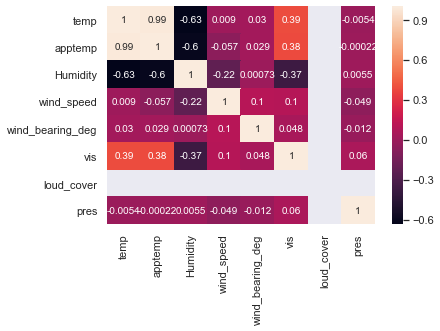

In [91]:
ax=sns.heatmap(df.corr(), annot=True)
ax.set_ylim(8.0, 0)

In [10]:
%matplotlib inline

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
dates               96453 non-null object
Summary             96453 non-null object
precip_type         96453 non-null object
temp                96453 non-null float64
apptemp             96453 non-null float64
Humidity            96453 non-null float64
wind_speed          96453 non-null float64
wind_bearing_deg    96453 non-null float64
vis                 96453 non-null float64
loud_cover          96453 non-null float64
pres                96453 non-null float64
summary             96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [12]:
df.dates=pd.to_datetime(df.dates, utc=True )

In [13]:
Date=pd.DatetimeIndex(df.dates)

Text(0, 0.5, 'Temp')

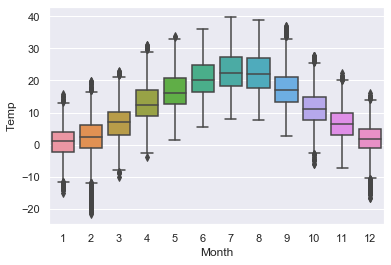

In [14]:
sns.boxplot(x=Date.month,y=df.temp)
plt.xlabel("Month")
plt.ylabel("Temp")

Text(0, 0.5, 'Temp')

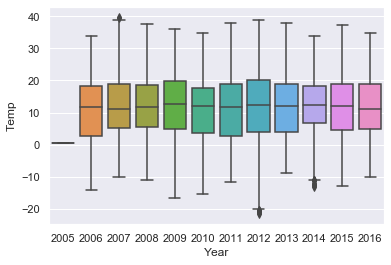

In [15]:
sns.boxplot(x=Date.year,y=df.temp)
plt.xlabel("Year")
plt.ylabel("Temp")
#both min max temp seems to follow a 3 year pattern
#2006,2009,2012,2015 seems to have high max and min temp as compared to other years.


In [16]:
#pd.concat([df, Month], axis=1)

In [17]:
df.head()

,dates,Summary,precip_type,temp,apptemp,Humidity,wind_speed,wind_bearing_deg,vis,loud_cover,pres,summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [18]:
Month=pd.DataFrame(Date.month)

In [19]:
df.Summary=df.Summary.astype('category')
df.precip_type=df.precip_type.astype('category')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
dates               96453 non-null datetime64[ns, UTC]
Summary             96453 non-null category
precip_type         96453 non-null category
temp                96453 non-null float64
apptemp             96453 non-null float64
Humidity            96453 non-null float64
wind_speed          96453 non-null float64
wind_bearing_deg    96453 non-null float64
vis                 96453 non-null float64
loud_cover          96453 non-null float64
pres                96453 non-null float64
summary             96453 non-null object
dtypes: category(2), datetime64[ns, UTC](1), float64(8), object(1)
memory usage: 7.5+ MB


In [21]:
data=df.iloc[:,1:11]

In [22]:
data.loc[:,"month"]=Date.month

In [23]:
data.head(4)

,Summary,precip_type,temp,apptemp,Humidity,wind_speed,wind_bearing_deg,vis,loud_cover,pres,month
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,3
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,3
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,4
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,4


In [24]:
data.month=data.month.astype('category')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
Summary             96453 non-null category
precip_type         96453 non-null category
temp                96453 non-null float64
apptemp             96453 non-null float64
Humidity            96453 non-null float64
wind_speed          96453 non-null float64
wind_bearing_deg    96453 non-null float64
vis                 96453 non-null float64
loud_cover          96453 non-null float64
pres                96453 non-null float64
month               96453 non-null category
dtypes: category(3), float64(8)
memory usage: 6.2 MB


In [26]:
#data.rename(columns={"dates":'Month'}, inplace=True)

In [27]:
Stat=data.describe()
Stat

,temp,apptemp,Humidity,wind_speed,wind_bearing_deg,vis,loud_cover,pres
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [28]:
df.loud_cover.describe()

count    96453.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loud_cover, dtype: float64

In [29]:
data.drop(labels='loud_cover', axis=1, inplace=True)

In [30]:
IQR=Stat.loc[["25%","75%"],:].diff().loc["75%",:]
IQR

temp                 14.150000
apptemp              16.527778
Humidity              0.290000
wind_speed            8.307600
wind_bearing_deg    174.000000
vis                   6.472200
loud_cover            0.000000
pres                  9.190000
Name: 75%, dtype: float64

In [31]:
lower=Stat.loc["75%",:]-1.5*IQR
lower

temp                  -2.386111
apptemp               -5.952778
Humidity               0.455000
wind_speed             1.674400
wind_bearing_deg      29.000000
vis                    5.103700
loud_cover             0.000000
pres                1007.305000
Name: 75%, dtype: float64

In [32]:
upper=Stat.loc["75%",:]+1.5*IQR
upper

temp                  40.063889
apptemp               43.630556
Humidity               1.325000
wind_speed            26.597200
wind_bearing_deg     551.000000
vis                   24.520300
loud_cover             0.000000
pres                1034.875000
Name: 75%, dtype: float64

In [33]:
data=data.loc[(data.temp>-2.386111) & (data.temp <40.063889),]

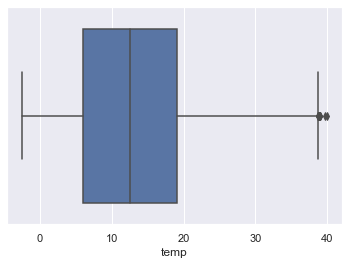

In [34]:
sns.boxplot(data.temp)

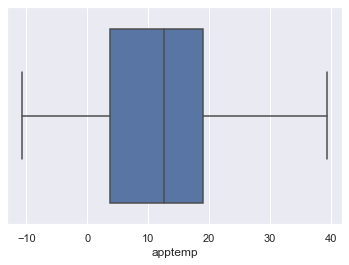

In [35]:
sns.boxplot(data.apptemp)

In [36]:
data=data.loc[(data.apptemp>-5.952778) & (data.apptemp <43.630556),]

In [37]:
data=data.loc[(data.wind_speed>1.674400) & (data.wind_speed <26.597200),]

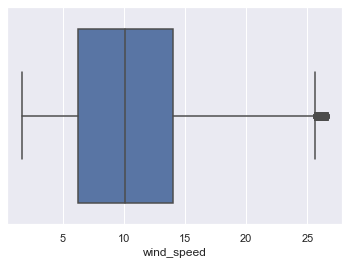

In [38]:
sns.boxplot(data.wind_speed)

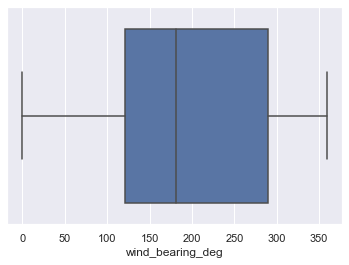

In [39]:
sns.boxplot(data.wind_bearing_deg)

In [40]:
data=data.loc[(data.wind_bearing_deg>174.000000) & (data.wind_bearing_deg <551.000000),]

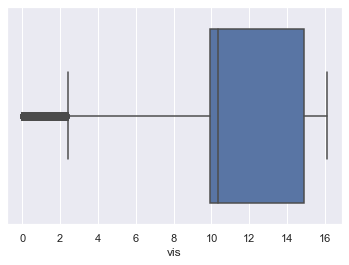

In [41]:
sns.boxplot(data.vis)

In [42]:
data=data.loc[(data.vis>5.103700) & (data.vis <24.520300),]

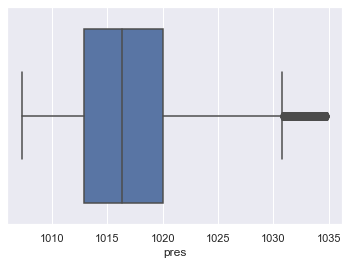

In [92]:
sns.boxplot(data.pres)

In [44]:
data=data.loc[(data.pres>1007.305000) & (data.pres <1034.875000),]

In [45]:
data.describe()

,temp,apptemp,Humidity,wind_speed,wind_bearing_deg,vis,pres
count,35312.000000,35312.000000,35312.000000,35312.000000,35312.000000,35312.000000,35312.000000
mean,14.613307,13.884837,0.698451,10.640465,277.136639,11.754459,1016.839472
std,8.602470,9.502382,0.197676,5.715497,53.906359,2.952981,5.310836
min,-2.383333,-5.950000,0.130000,1.690500,175.000000,5.119800,1007.310000
25%,7.777778,6.127778,0.550000,6.246800,231.000000,9.982000,1012.910000
50%,14.877778,14.877778,0.740000,10.255700,290.000000,10.980200,1016.330000
75%,20.911111,20.911111,0.860000,14.119700,321.000000,15.134000,1020.070000
max,39.905556,39.344444,1.000000,26.565000,359.000000,16.100000,1034.840000


In [46]:
Dum=pd.get_dummies(data.loc[:,["Summary","month"]], drop_first=True)

In [47]:
data=pd.concat([data,Dum], axis=1)

In [48]:
data.head(1)

,Summary,precip_type,temp,apptemp,Humidity,wind_speed,wind_bearing_deg,vis,pres,month,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,3,...,1,0,0,0,0,0,0,0,0,0


In [49]:
data.drop(columns=["Summary","month","precip_type"], inplace=True)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
data.columns

Index(['temp', 'apptemp', 'Humidity', 'wind_speed', 'wind_bearing_deg', 'vis',
       'pres', 'Summary_Breezy and Dry', 'Summary_Breezy and Foggy',
       'Summary_Breezy and Mostly Cloudy', 'Summary_Breezy and Overcast',
       'Summary_Breezy and Partly Cloudy', 'Summary_Clear',
       'Summary_Dangerously Windy and Partly Cloudy', 'Summary_Drizzle',
       'Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Dry and Partly Cloudy', 'Summary_Foggy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Humid and Partly Cloudy', 'Summary_Light Rain',
       'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 

In [52]:
'''X=data.loc[:,['apptemp', 'Humidity', 'wind_speed',
       'wind_bearing_deg', 'vis', 'pres', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy', 'Summary_Breezy and Mostly Cloudy',
       'Summary_Breezy and Overcast', 'Summary_Breezy and Partly Cloudy',
       'Summary_Clear', 'Summary_Dangerously Windy and Partly Cloudy',
       'Summary_Drizzle', 'Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Dry and Partly Cloudy', 'Summary_Foggy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Humid and Partly Cloudy', 'Summary_Light Rain',
       'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]
y=data.loc[:,"temp"]'''
'''X=data.loc[:,['apptemp', 'Humidity', 'wind_speed',
       'wind_bearing_deg', 'vis', 'pres', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy', 'Summary_Breezy and Mostly Cloudy',
       'Summary_Breezy and Overcast', 'Summary_Breezy and Partly Cloudy','Summary_Dangerously Windy and Partly Cloudy',
       'Summary_Drizzle', 'Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Dry and Partly Cloudy', 'Summary_Foggy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Humid and Partly Cloudy', 'Summary_Light Rain',
       'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]
y=data.loc[:,"temp"]'''
'''X=data.loc[:,['apptemp', 'Humidity', 'wind_speed',
       'wind_bearing_deg', 'vis', 'pres', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy',
       'Summary_Breezy and Overcast', 'Summary_Breezy and Partly Cloudy','Summary_Dangerously Windy and Partly Cloudy',
       'Summary_Drizzle', 'Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Dry and Partly Cloudy', 'Summary_Foggy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Humid and Partly Cloudy', 'Summary_Light Rain',
       'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]
y=data.loc[:,"temp"]'''
'''X=data.loc[:,['apptemp', 'Humidity', 'wind_speed',
       'wind_bearing_deg', 'vis', 'pres', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy',
       'Summary_Breezy and Overcast', 'Summary_Breezy and Partly Cloudy','Summary_Dangerously Windy and Partly Cloudy','Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Dry and Partly Cloudy', 'Summary_Foggy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Humid and Partly Cloudy', 'Summary_Light Rain',
       'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]
y=data.loc[:,"temp"]'''
'''X=data.loc[:,['apptemp', 'Humidity', 'wind_speed',
       'wind_bearing_deg', 'vis', 'pres', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy',
       'Summary_Breezy and Overcast','Summary_Dangerously Windy and Partly Cloudy','Summary_Dry', 'Summary_Dry and Mostly Cloudy','Summary_Foggy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Humid and Partly Cloudy', 'Summary_Light Rain',
       'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]
y=data.loc[:,"temp"]'''

'X=data.loc[:,[\'apptemp\', \'Humidity\', \'wind_speed\',\n       \'wind_bearing_deg\', \'vis\', \'pres\', \'Summary_Breezy and Dry\',\n       \'Summary_Breezy and Foggy\',\n       \'Summary_Breezy and Overcast\',\'Summary_Dangerously Windy and Partly Cloudy\',\'Summary_Dry\', \'Summary_Dry and Mostly Cloudy\',\'Summary_Foggy\',\n       \'Summary_Humid and Mostly Cloudy\', \'Summary_Humid and Overcast\',\n       \'Summary_Humid and Partly Cloudy\', \'Summary_Light Rain\',\n       \'Summary_Mostly Cloudy\', \'Summary_Overcast\', \'Summary_Partly Cloudy\',\n       \'Summary_Rain\', \'Summary_Windy\', \'Summary_Windy and Dry\',\n       \'Summary_Windy and Foggy\', \'Summary_Windy and Mostly Cloudy\',\n       \'Summary_Windy and Overcast\', \'Summary_Windy and Partly Cloudy\',\n       \'month_2\', \'month_3\', \'month_4\', \'month_5\', \'month_6\', \'month_7\',\n       \'month_8\', \'month_9\', \'month_10\', \'month_11\', \'month_12\']]\ny=data.loc[:,"temp"]'

In [53]:
'''X=data.loc[:,['apptemp', 'Humidity', 'wind_speed',
       'wind_bearing_deg', 'vis', 'pres', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy',
       'Summary_Breezy and Overcast','Summary_Dangerously Windy and Partly Cloudy','Summary_Dry', 'Summary_Dry and Mostly Cloudy','Summary_Foggy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast', 'Summary_Light Rain',
       'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]
y=data.loc[:,"temp"]'''
'''X=data.loc[:,['apptemp', 'Humidity', 'wind_speed',
       'wind_bearing_deg', 'vis', 'pres', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy',
       'Summary_Breezy and Overcast','Summary_Dangerously Windy and Partly Cloudy','Summary_Dry', 'Summary_Dry and Mostly Cloudy','Summary_Foggy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]
y=data.loc[:,"temp"]'''
'''X=data.loc[:,['apptemp', 'Humidity', 'wind_speed',
       'wind_bearing_deg', 'vis', 'pres', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy',
       'Summary_Breezy and Overcast','Summary_Dangerously Windy and Partly Cloudy','Summary_Dry', 'Summary_Dry and Mostly Cloudy','Summary_Foggy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast','Summary_Overcast', 'Summary_Partly Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]
y=data.loc[:,"temp"]'''

'X=data.loc[:,[\'apptemp\', \'Humidity\', \'wind_speed\',\n       \'wind_bearing_deg\', \'vis\', \'pres\', \'Summary_Breezy and Dry\',\n       \'Summary_Breezy and Foggy\',\n       \'Summary_Breezy and Overcast\',\'Summary_Dangerously Windy and Partly Cloudy\',\'Summary_Dry\', \'Summary_Dry and Mostly Cloudy\',\'Summary_Foggy\',\n       \'Summary_Humid and Mostly Cloudy\', \'Summary_Humid and Overcast\',\'Summary_Overcast\', \'Summary_Partly Cloudy\',\n       \'Summary_Rain\', \'Summary_Windy\', \'Summary_Windy and Dry\',\n       \'Summary_Windy and Foggy\', \'Summary_Windy and Mostly Cloudy\',\n       \'Summary_Windy and Overcast\', \'Summary_Windy and Partly Cloudy\',\n       \'month_2\', \'month_3\', \'month_4\', \'month_5\', \'month_6\', \'month_7\',\n       \'month_8\', \'month_9\', \'month_10\', \'month_11\', \'month_12\']]\ny=data.loc[:,"temp"]'

In [54]:
'''X=data.loc[:,['apptemp', 'Humidity', 'wind_speed',
       'wind_bearing_deg', 'vis', 'pres', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy',
       'Summary_Breezy and Overcast','Summary_Dangerously Windy and Partly Cloudy','Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast','Summary_Overcast', 'Summary_Partly Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]
y=data.loc[:,"temp"]'''
'''X=data.loc[:,['apptemp', 'Humidity', 'wind_speed',
       'wind_bearing_deg', 'vis', 'pres', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy',
       'Summary_Breezy and Overcast','Summary_Dangerously Windy and Partly Cloudy','Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast','Summary_Partly Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]
y=data.loc[:,"temp"]'''
'''X=data.loc[:,['apptemp', 'Humidity', 'wind_speed',
       'wind_bearing_deg', 'vis', 'pres', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy',
       'Summary_Breezy and Overcast','Summary_Dangerously Windy and Partly Cloudy','Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]
y=data.loc[:,"temp"]'''

'X=data.loc[:,[\'apptemp\', \'Humidity\', \'wind_speed\',\n       \'wind_bearing_deg\', \'vis\', \'pres\', \'Summary_Breezy and Dry\',\n       \'Summary_Breezy and Foggy\',\n       \'Summary_Breezy and Overcast\',\'Summary_Dangerously Windy and Partly Cloudy\',\'Summary_Dry\', \'Summary_Dry and Mostly Cloudy\',\n       \'Summary_Humid and Mostly Cloudy\', \'Summary_Humid and Overcast\',\n       \'Summary_Rain\', \'Summary_Windy\', \'Summary_Windy and Dry\',\n       \'Summary_Windy and Foggy\', \'Summary_Windy and Mostly Cloudy\',\n       \'Summary_Windy and Overcast\', \'Summary_Windy and Partly Cloudy\',\n       \'month_2\', \'month_3\', \'month_4\', \'month_5\', \'month_6\', \'month_7\',\n       \'month_8\', \'month_9\', \'month_10\', \'month_11\', \'month_12\']]\ny=data.loc[:,"temp"]'

In [55]:
'''X=data.loc[:,['apptemp', 'Humidity', 'wind_speed',
       'wind_bearing_deg', 'vis', 'pres', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy',
       'Summary_Breezy and Overcast','Summary_Dangerously Windy and Partly Cloudy','Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Rain', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]
y=data.loc[:,"temp"]'''
'''X=data.loc[:,['apptemp', 'Humidity', 'wind_speed',
       'wind_bearing_deg', 'vis', 'pres', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy',
       'Summary_Breezy and Overcast','Summary_Dangerously Windy and Partly Cloudy','Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Rain',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]
y=data.loc[:,"temp"]'''
'''X=data.loc[:,['apptemp', 'Humidity', 'wind_speed',
       'wind_bearing_deg', 'vis', 'pres', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy',
       'Summary_Breezy and Overcast','Summary_Dangerously Windy and Partly Cloudy','Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]
y=data.loc[:,"temp"]'''
'''X=data.loc[:,['apptemp', 'Humidity', 'wind_speed',
       'wind_bearing_deg', 'vis', 'pres', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy',
       'Summary_Breezy and Overcast','Summary_Dangerously Windy and Partly Cloudy','Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]
y=data.loc[:,"temp"]'''
'''X=data.loc[:,['apptemp', 'Humidity', 'wind_speed',
       'wind_bearing_deg', 'vis', 'pres', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy',
       'Summary_Breezy and Overcast','Summary_Dangerously Windy and Partly Cloudy','Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]
y=data.loc[:,"temp"]'''
'''X=data.loc[:,['apptemp', 'Humidity', 'wind_speed',
       'wind_bearing_deg', 'vis', 'pres', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy',
       'Summary_Breezy and Overcast','Summary_Dangerously Windy and Partly Cloudy','Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Humid and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]
y=data.loc[:,"temp"]'''

'X=data.loc[:,[\'apptemp\', \'Humidity\', \'wind_speed\',\n       \'wind_bearing_deg\', \'vis\', \'pres\', \'Summary_Breezy and Dry\',\n       \'Summary_Breezy and Foggy\',\n       \'Summary_Breezy and Overcast\',\'Summary_Dangerously Windy and Partly Cloudy\',\'Summary_Dry\', \'Summary_Dry and Mostly Cloudy\',\n       \'Summary_Humid and Mostly Cloudy\',\n       \'Summary_Windy and Overcast\', \'Summary_Windy and Partly Cloudy\',\n       \'month_2\', \'month_3\', \'month_4\', \'month_5\', \'month_6\', \'month_7\',\n       \'month_8\', \'month_9\', \'month_10\', \'month_11\', \'month_12\']]\ny=data.loc[:,"temp"]'

In [56]:
'''X=data.loc[:,['apptemp', 'Humidity', 'wind_speed',
       'wind_bearing_deg', 'vis', 'pres', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy',
       'Summary_Breezy and Overcast','Summary_Dangerously Windy and Partly Cloudy','Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Humid and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy','month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]
y=data.loc[:,"temp"]'''
'''X=data.loc[:,['apptemp', 'Humidity', 'wind_speed',
       'wind_bearing_deg', 'vis', 'pres', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy',
       'Summary_Breezy and Overcast','Summary_Dangerously Windy and Partly Cloudy','Summary_Dry', 'Summary_Dry and Mostly Cloudy','month_3', 'month_4', 'month_5', 'month_6', 'month_7','month_9', 'month_10', 'month_11', 'month_12']]
y=data.loc[:,"temp"]'''
'''X=data.loc[:,['apptemp', 'Humidity', 'wind_speed',
       'wind_bearing_deg', 'vis', 'pres', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy',
       'Summary_Breezy and Overcast','Summary_Dangerously Windy and Partly Cloudy','Summary_Dry', 'Summary_Dry and Mostly Cloudy', 'month_4', 'month_5', 'month_6', 'month_7','month_9', 'month_10', 'month_11', 'month_12']]
y=data.loc[:,"temp"]'''

'X=data.loc[:,[\'apptemp\', \'Humidity\', \'wind_speed\',\n       \'wind_bearing_deg\', \'vis\', \'pres\', \'Summary_Breezy and Dry\',\n       \'Summary_Breezy and Foggy\',\n       \'Summary_Breezy and Overcast\',\'Summary_Dangerously Windy and Partly Cloudy\',\'Summary_Dry\', \'Summary_Dry and Mostly Cloudy\', \'month_4\', \'month_5\', \'month_6\', \'month_7\',\'month_9\', \'month_10\', \'month_11\', \'month_12\']]\ny=data.loc[:,"temp"]'

In [57]:
'''X=data.loc[:,['apptemp', 'Humidity', 'wind_speed',
       'wind_bearing_deg', 'vis', 'pres', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy',
       'Summary_Breezy and Overcast','Summary_Dangerously Windy and Partly Cloudy','Summary_Dry', 'Summary_Dry and Mostly Cloudy', 'month_4', 'month_5', 'month_6', 'month_7', 'month_10', 'month_11', 'month_12']]
y=data.loc[:,"temp"]'''
'''X=data.loc[:,['apptemp', 'Humidity', 'wind_speed',
       'wind_bearing_deg', 'vis', 'pres']]
y=data.loc[:,"temp"]'''

'X=data.loc[:,[\'apptemp\', \'Humidity\', \'wind_speed\',\n       \'wind_bearing_deg\', \'vis\', \'pres\']]\ny=data.loc[:,"temp"]'

In [58]:
'''X=data.loc[:,['apptemp', 'Humidity', 'wind_speed',
       'wind_bearing_deg', 'vis']]
y=data.loc[:,"temp"]'''
"""X=data.loc[:,['apptemp', 'Humidity', 'wind_speed']]
y=data.loc[:,"temp"]"""

'X=data.loc[:,[\'apptemp\', \'Humidity\', \'wind_speed\']]\ny=data.loc[:,"temp"]'

# Final Model

In [59]:
X=data.loc[:,['apptemp', 'wind_speed', 
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_9', 'month_10', 'month_11', 'month_12']]
y=data.loc[:,"temp"]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1429)

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
sc=StandardScaler()

In [63]:

X_train_sc=sc.fit_transform(X_train, y_train)
X_test_sc=sc.fit_transform(X_test,y_test)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
reg=LinearRegression()

In [66]:
reg.fit(X_train_sc,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
Coefficient=pd.DataFrame(data=reg.coef_, index=X_train.columns, columns=["Coef"])

Coefficient.iloc[11,]

Coef    0.077797
Name: month_12, dtype: float64

In [68]:
Coefficient

,Coef
apptemp,8.627494
wind_speed,0.395965
month_2,0.016743
month_3,-0.074422
month_4,-0.170375
month_5,-0.196085
month_6,-0.128507
month_7,-0.073916
month_9,-0.160040
month_10,-0.149420


In [69]:
Rsq=reg.score(X_train_sc,y_train)
Rsq

0.9913413640670432

In [70]:
import statsmodels.api as sm

In [71]:
X_train_sc=sm.add_constant(X_train_sc)
#X_train=sm.add_constant(X_train)

In [72]:
REG=sm.OLS(y_train,X_train_sc).fit()

In [73]:
REG.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 2.189e+05
Date:                Tue, 01 Oct 2019   Prob (F-statistic):               0.00
Time:                        17:00:31   Log-Likelihood:                -27464.
No. Observations:               22952   AIC:                         5.495e+04
Df Residuals:                   22939   BIC:                         5.506e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.6341      0.005   2768.339      0.000      14.624      14.644
x1             8.6275      0.007   1216.077      0.000       8.614       8.641
x2             0.3960      0.005     74.234      0.000       0.386       0.406
x3             0.0167      0.006      2.669      0.008       0.004       0.029
x4            -0.0744      0.006    -11.460      0.000      -0.087      -0.062
x5            -0.1704      0.006    -27.084      0.000      -0.183      -0.158
x6            -0.1961      0.006    -30.736      0.000      -0.209      -0.184
x7            -0.1285      0.007    -19.559      0.000      -0.141      -0.116
x8            -0.0739      0.007    -11.058      0.000      -0.087      -0.061
x9            -0.1600      0.006    -25.142      0.000      -0.173      -0.148
x10           -0.1494      0.006    -24.217      0.000      -0.162      -0.137
x11           -0.0366      0.006     -5.970      0.000      -0.049      -0.025
x12            0.0778      0.006     12.388      0.000       0.065       0.090
==============================================================================
Omnibus:                      270.117   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              328.054
Skew:                           0.199   Prob(JB):                     5.81e-72
Kurtosis:                       3.430   Cond. No.                         3.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,3.899122,apptemp
1,3.621932,wind_speed
2,1.148046,month_2
3,1.220229,month_3
4,1.252422,month_4
5,1.386824,month_5
6,1.566729,month_6
7,1.693784,month_7
8,1.375372,month_9
9,1.184372,month_10


In [76]:
pred=reg.predict(X_test_sc)

In [77]:
np.mean(abs(y_test-pred)/y_test)

inf

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
np.sqrt(mean_squared_error(y_test, pred))

0.8094426157636937

Text(0, 0.5, 'Predicted Temp')

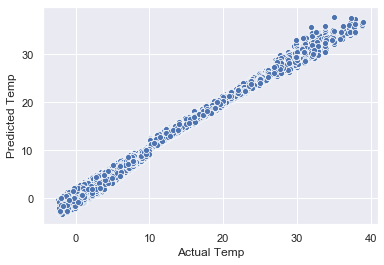

In [94]:
sns.scatterplot(y_test, pred)
plt.xlabel('Actual Temp')
plt.ylabel('Predicted Temp')